In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import os

import cordex as cx

import pyremo as pr
from pyremo import cmor as prcmor

In [120]:
files = glob.glob("/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e*m*.nc")
files.sort()
files

['/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200001.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200002.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200003.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200004.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200005.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200006.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200007.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200008.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200009.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200010.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200011.nc',
 '/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/e056000m200012.nc']

In [121]:
import xarray as xr

ds = xr.open_mfdataset(files, data_vars="minimal", coords="minimal")
ds = pr.parse_dates(ds)

In [127]:
eur11 = cx.cordex_domain("EUR-11")
ds = ds.assign_coords({"lon": eur11.lon, "lat": eur11.lat})
filename = prcmor.cmorize_variable(
    ds,
    "tas",
    # cmor_table="/Users/lars/.cordex-cmor-tables/CORDEX_fx.json",
    cmor_table=cx.tables.cmip6_cmor_table("CMIP6_Amon"),
    # cmor_table="/Users/lars/python/euro-cordex/tables/cordex-cmor-tables/CORDEX-CMIP5/CORDEX_fx.json",
    dataset_table=cx.tables.cordex_cmor_table("CORDEX_remo_example"),
    # dataset_table="/Users/lars/python/packages/cmor/Test/CMOR_input_example.json",
    CORDEX_domain="EUR-11",
    time_units=None,
    allow_units_convert=True,
    allow_derive=True,
    # inpath = cx.tables.cmor_tables_inpath,
    # inpath="/Users/lars/.cordex-cmor-tables",
    # inpath="/Users/lars/python/euro-cordex/tables/cordex-cmor-tables/CORDEX-CMIP5"
)

/home/g/g300046/python/packages/pyremo/pyremo/cmor/remo_cmor.py:288: UserWarning: could not determine frequency of input data, will assume it is correct.
  warn('could not determine frequency of input data, will assume it is correct.')


In [128]:
filename

<xarray.Dataset>
Dimensions:                     (time: 12, rlat: 433, rlon: 433, bounds: 2)
Coordinates:
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
    lon                         (rlat, rlon) float64 nan nan nan ... nan nan nan
    lat                         (rlat, rlon) float64 nan nan nan ... nan nan nan
  * time                        (time) datetime64[ns] 2000-01-15 ... 2000-12-15
    time_bounds                 (bounds, time) datetime64[ns] 1999-12-30T12:0...
Dimensions without coordinates: bounds
Data variables:
    tas                         (time, rlat, rlon) float32 dask.array<chunksize=(1, 433, 433), meta=np.ndarray>
    rotated_latitude_longitude  int32 0
Attributes:
    remo_version:  2.0.0
    git_branch:    nc_meta
    git_hash:      c4ee7f4
    system:        Linux eddy3 2.6.32-754.33.1.el6.x86_64 #1 SMP Mon Aug 10 1...

In [60]:
import xarray as xr

out = xr.open_dataset(filename)
out

<xarray.Dataset>
Dimensions:                     (time: 12, bnds: 2, rlat: 433, rlon: 433)
Coordinates:
  * time                        (time) datetime64[ns] 2000-01-15 ... 2000-12-15
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
    latitude                    (rlat, rlon) float64 ...
    longitude                   (rlat, rlon) float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds                   (time, bnds) datetime64[ns] ...
    rotated_latitude_longitude  int32 ...
    prc                         (time, rlat, rlon) float32 ...
Attributes: (12/53)
    CORDEX_domain:           EUR-11
    Conventions:             CF-1.7 CMIP-6.2
    activity_id:             CORDEX
    branch_method:           standard
    branch_time_in_child:    59400.0
    branch_time_in_parent:   59400.0
    ...                      ...
    title:                   REMO2-0-0 output prepared for CMIP6
    tracking_id:             hdl:21.14100/4d739949-b472-4a13-9ee8-693386a54ead
    variable_id:             prc
    variant_label:           r1i1p1f1
    license:                 CMIP6 model data produced by Lawrence Livermore ...
    cmor_version:            3.6.1

In [10]:
cx.cordex_cmor_table("Amon")

'/Users/lars/.cordex-cmor-tables/CORDEX_Amon.json'

Fontconfig warning: ignoring UTF-8: not a valid region tag


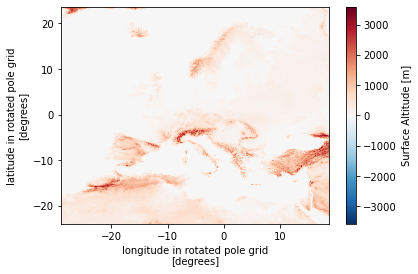

In [6]:
import xarray as xr

ds = xr.open_dataset(filename)
ds.orog.plot()

In [131]:
ds = xr.open_dataset(
    "/work/ch0636/g300046/from_Mistral/remo_results_056000/2000/hourly/e056000e_c167_200001.nc"
)
ds = pr.parse_dates(ds)
ds

<xarray.Dataset>
Dimensions:                     (rlon: 433, rlat: 433, height2m: 1, time: 744)
Coordinates:
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
  * height2m                    (height2m) float64 2.0
    lon                         (rlat, rlon) float64 ...
    lat                         (rlat, rlon) float64 ...
  * time                        (time) datetime64[ns] 2000-01-01T01:00:00 ......
Data variables:
    rotated_latitude_longitude  |S1 ...
    TEMP2                       (time, height2m, rlat, rlon) float32 ...
Attributes:
    remo_version:  2.0.0
    git_branch:    nc_meta
    git_hash:      c4ee7f4
    system:        Linux eddy3 2.6.32-754.33.1.el6.x86_64 #1 SMP Mon Aug 10 1...

In [132]:
ds

<xarray.Dataset>
Dimensions:                     (rlon: 433, rlat: 433, height2m: 1, time: 744)
Coordinates:
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
  * height2m                    (height2m) float64 2.0
    lon                         (rlat, rlon) float64 ...
    lat                         (rlat, rlon) float64 ...
  * time                        (time) datetime64[ns] 2000-01-01T01:00:00 ......
Data variables:
    rotated_latitude_longitude  |S1 b''
    TEMP2                       (time, height2m, rlat, rlon) float32 ...
Attributes:
    remo_version:  2.0.0
    git_branch:    nc_meta
    git_hash:      c4ee7f4
    system:        Linux eddy3 2.6.32-754.33.1.el6.x86_64 #1 SMP Mon Aug 10 1...

In [133]:
eur11 = cx.cordex_domain("EUR-11")
ds = ds.assign_coords({"lon": eur11.lon, "lat": eur11.lat})
out = prcmor.cmorize_variable(
    ds,
    "tas",
    cmor_table=cx.tables.cmip6_cmor_table("CMIP6_day"),
    dataset_table=cx.tables.cordex_cmor_table("CORDEX_remo_example"),
    CORDEX_domain="EUR-11",
    time_units=None,
    allow_units_convert=True,
)

/home/g/g300046/python/packages/pyremo/pyremo/cmor/remo_cmor.py:290: UserWarning: resampling input data from H to D
  freq = freq_map[cfvarinfo['frequency']]


In [134]:
out

<xarray.Dataset>
Dimensions:                     (time: 32, rlat: 433, rlon: 433)
Coordinates:
  * time                        (time) datetime64[ns] 2000-01-01T12:00:00 ......
  * rlon                        (rlon) float64 -28.93 -28.82 ... 18.49 18.6
  * rlat                        (rlat) float64 -23.93 -23.82 ... 23.49 23.6
    lon                         (rlat, rlon) float64 nan nan nan ... nan nan nan
    lat                         (rlat, rlon) float64 nan nan nan ... nan nan nan
Data variables:
    tas                         (time, rlat, rlon) float32 290.8 290.8 ... 254.5
    rotated_latitude_longitude  int32 0
Attributes:
    remo_version:  2.0.0
    git_branch:    nc_meta
    git_hash:      c4ee7f4
    system:        Linux eddy3 2.6.32-754.33.1.el6.x86_64 #1 SMP Mon Aug 10 1...

In [116]:
import cf_xarray as cfxr

out.cf.add_bounds("time").cf.bounds

{'time': ['time_bounds']}

In [66]:
from pyremo.cmor import utils

In [101]:
varinfo = utils._get_cfvarinfo("tas", cx.tables.cmip6_cmor_table("CMIP6_day"))
varinfo

{'frequency': 'day',
 'modeling_realm': 'atmos',
 'standard_name': 'air_temperature',
 'units': 'K',
 'cell_methods': 'area: time: mean',
 'cell_measures': 'area: areacella',
 'long_name': 'Near-Surface Air Temperature',
 'comment': 'near-surface (usually, 2 meter) air temperature',
 'dimensions': 'longitude latitude time height2m',
 'out_name': 'tas',
 'type': 'real',
 'positive': '',
 'valid_min': '',
 'valid_max': '',
 'ok_min_mean_abs': '',
 'ok_max_mean_abs': ''}

In [78]:
from pyremo.cmor import remo_cmor

In [82]:
remo_cmor.adjust_frequency(ds, varinfo)

/home/g/g300046/python/packages/pyremo/pyremo/cmor/remo_cmor.py:289: UserWarning: resampling input data from H to D
  warn('resampling input data from {} to {}'.format(input_freq, freq))


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('S1'), dtype('S1')) -> None